In [13]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

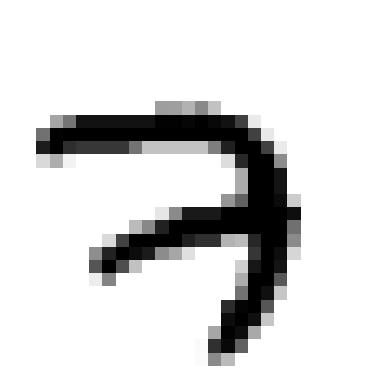

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

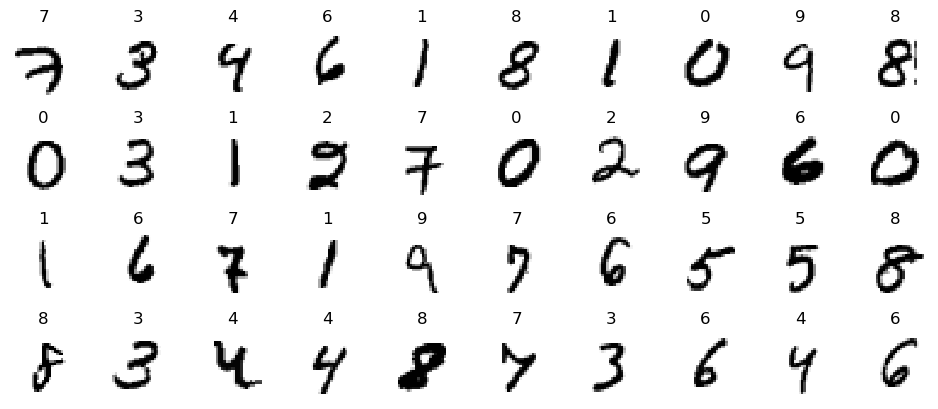

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [11]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [14]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [17]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 3s 2ms/step - loss: 1.4957 - accuracy: 0.6083 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

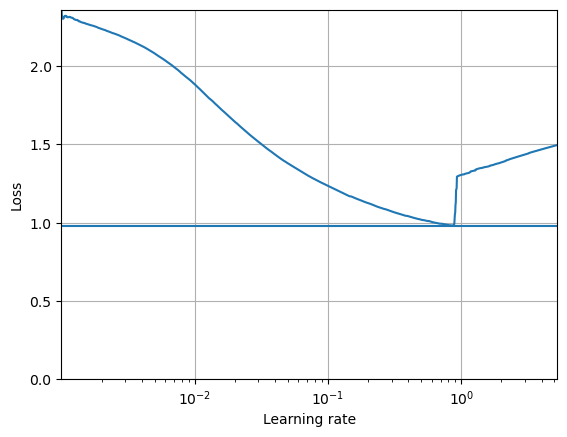

In [18]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [19]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [24]:
import os
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [25]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2355 - accuracy: 0.9260 - val_loss: 0.1071 - val_accuracy: 0.9686
Epoch 2/100
  76/1719 [>.............................] - ETA: 2s - loss: 0.0828 - accuracy: 0.9737

C:\Users\ma6114132\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 3s 1ms/step - loss: 0.0941 - accuracy: 0.9712 - val_loss: 0.1094 - val_accuracy: 0.9674
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0649 - accuracy: 0.9791 - val_loss: 0.0936 - val_accuracy: 0.9732
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0473 - accuracy: 0.9846 - val_loss: 0.0812 - val_accuracy: 0.9780
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.1038 - val_accuracy: 0.9726
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0815 - val_accuracy: 0.9786
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0707 - val_accuracy: 0.9814
Epoch 8/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0890 - val_accuracy: 0.97

In [26]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 821us/step - loss: 0.0724 - accuracy: 0.9813


[0.07240024209022522, 0.9812999963760376]

In [28]:
%load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

In [30]:
#%tensorboard --logdir=./my_mnist_logs --port=6006